# Random Search to Optimize ACO Hyperparameters

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')

In [34]:
def plot_std_dev_scatter_plot(data, xattr, yattr, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x=xattr, y=yattr, data=data, hue='cost_std', palette='coolwarm')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_dist(x, bins, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(x, kde=True, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_dist_(x, bins, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(x, kde=True, bins=bins)
    ax.axvline(x=np.mean(x), linestyle='--', label=f'Avg. Performance: ${np.mean(x):.6f}$')
    ax.axvline(x=np.min(x), color='darkmagenta', linestyle='--', label=f'Best Performance: ${np.min(x):.6f}$')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def get_subinterval(x, y, attr):
    # compute the average value of y in each subinterval
    num_subintervals = 10
    subinterval_width = (np.max(x) - np.min(x)) / num_subintervals
    subinterval_centers = np.linspace(np.min(x) + subinterval_width/2, np.max(x) - subinterval_width/2, num_subintervals)
    y_means = []
    for center in subinterval_centers:
        indices = (x >= center - subinterval_width/2) & (x <= center + subinterval_width/2)
        y_mean = np.mean(y[indices])
        y_means.append(y_mean)

    # choose the subinterval with the lowest average value of y
    min_index = np.argmin(y_means)
    min_subinterval_center = subinterval_centers[min_index]
    min_subinterval_width = subinterval_width

    # print the chosen subinterval
    print(f"{attr}: ({(min_subinterval_center - min_subinterval_width/2):.2f}, {(min_subinterval_center + min_subinterval_width/2):.2f})")

def plot_cost_dist(X):
    colors = ['tomato', 'olive', 'lightseagreen']
    labels = ['ACO Cost Mean', '1-Tree Cost Mean', 'MST Cost Mean']
    fig, ax = plt.subplots(figsize=(8, 6))
    for x, label, color in zip(X, labels, colors):
        sns.kdeplot(x, color=color)
        ax.axvline(x=np.mean(x), color=color, linestyle='--', label=f'{label}: {np.mean(x):.2f}')
    plt.xlabel('Cost')
    plt.title('Cost Distribution Plot')
    plt.legend()
    plt.show()

def plot_cost_line(X):
    colors = ['tomato', 'olive', 'lightseagreen']
    labels = ['ACO Cost Mean', '1-Tree Cost Mean', 'MST Cost Mean']
    fig, ax = plt.subplots(figsize=(8, 6))
    for x, label, color in zip(X, labels, colors):
        plt.plot(x, '.', color=color)
        ax.hlines(y=np.mean(x), xmin=0, xmax=100, color=color, linestyle='-', label=f'{label}: {np.mean(x):.2f}')
    plt.title('Cost Scatter Plot')
    plt.legend()
    plt.show()

# not used, is basically the same as plot_std_dev_scatter_plot
def plot_lineplot_plot(data, xattr, yattr, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    x = data[xattr]
    y = data[yattr]
    plt.plot(x, y, '.')
    sns.lineplot(x=xattr, y=yattr, data=data)
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept
    plt.plot(x, regression_line)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## 50 nodes

In [35]:
data50 = pd.read_csv('random_search_50.txt', delim_whitespace=True, header=None, names=['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'best_cost', 'avg_cost', 'cost_std', 'MSTCost', '1TreeCost'])

### Correlation Matrix

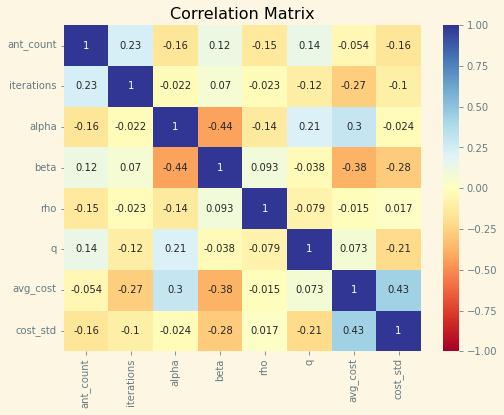

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

corr = data50[['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'avg_cost', 'cost_std']].corr()
sns.heatmap(corr, cmap='RdYlBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix')
plt.show()

### ACO Cost and ACO Cost STD Scatter Plot

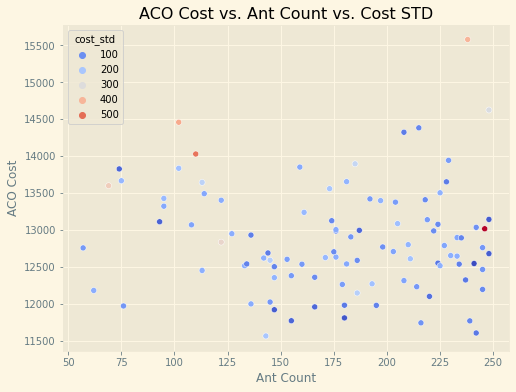

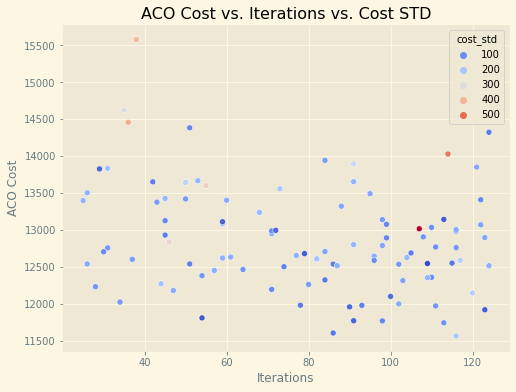

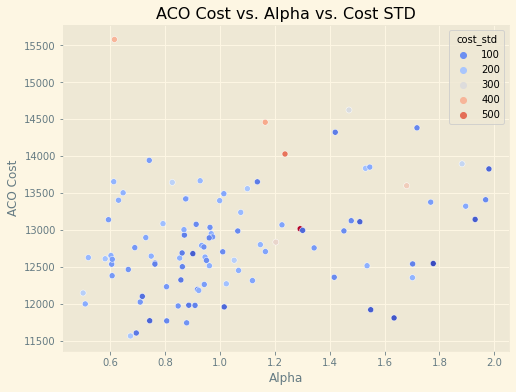

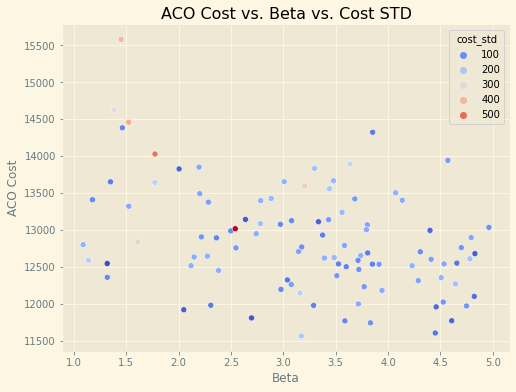

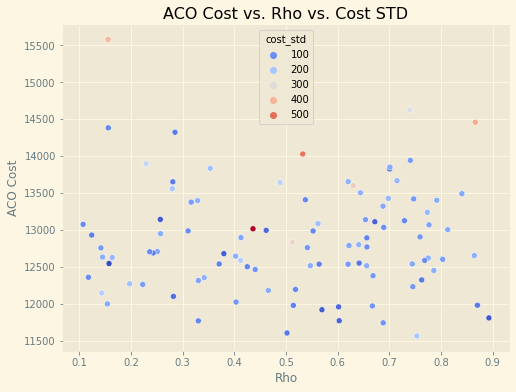

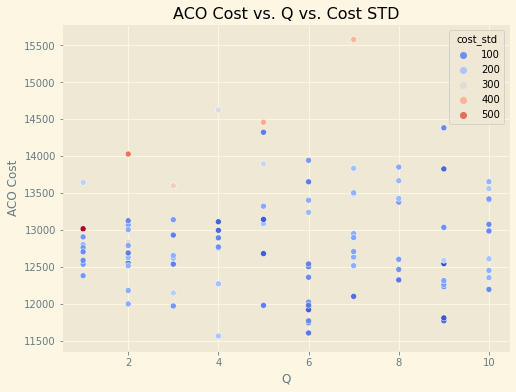

In [37]:
plot_std_dev_scatter_plot(data50, 'ant_count', 'avg_cost', 'Ant Count', 'ACO Cost', 'ACO Cost vs. Ant Count vs. Cost STD')
plot_std_dev_scatter_plot(data50, 'iterations', 'avg_cost', 'Iterations', 'ACO Cost' ,'ACO Cost vs. Iterations vs. Cost STD')
plot_std_dev_scatter_plot(data50, 'alpha', 'avg_cost', 'Alpha', 'ACO Cost', 'ACO Cost vs. Alpha vs. Cost STD')
plot_std_dev_scatter_plot(data50, 'beta', 'avg_cost', 'Beta', 'ACO Cost', 'ACO Cost vs. Beta vs. Cost STD')
plot_std_dev_scatter_plot(data50, 'rho', 'avg_cost', 'Rho', 'ACO Cost', 'ACO Cost vs. Rho vs. Cost STD')
plot_std_dev_scatter_plot(data50, 'q', 'avg_cost', 'Q', 'ACO Cost', 'ACO Cost vs. Q vs. Cost STD')

### Parameters Distributions

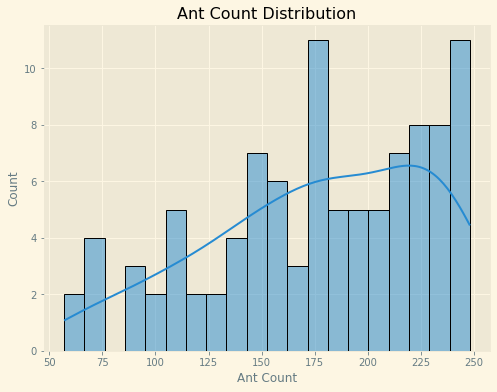

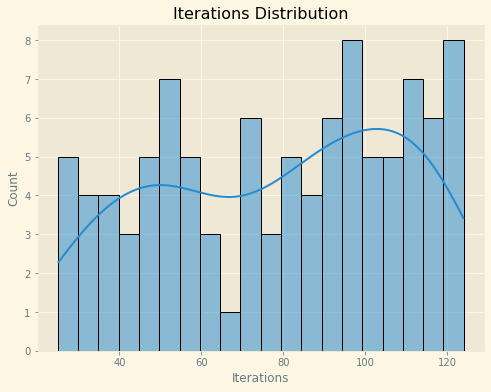

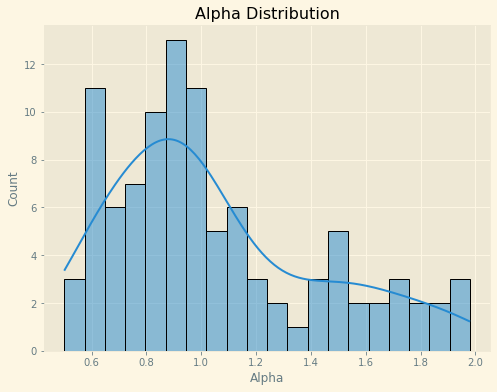

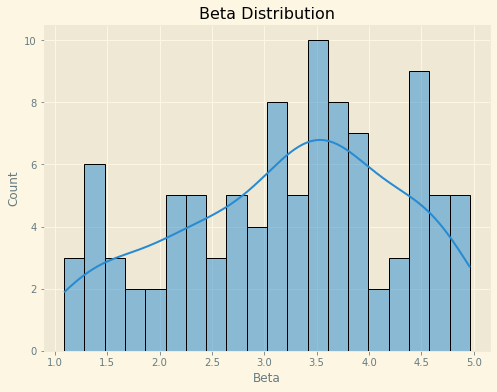

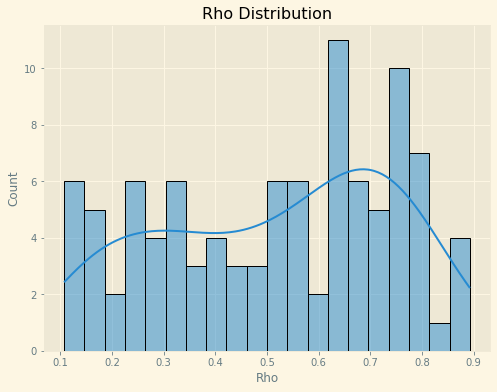

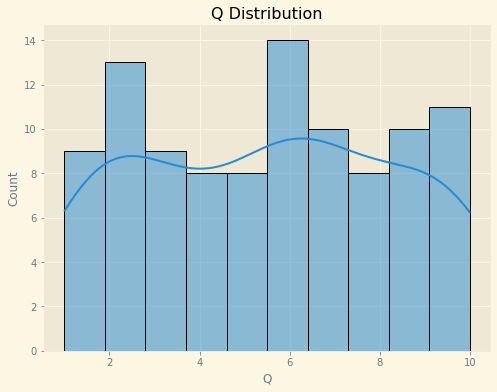

In [38]:
plot_dist(data50['ant_count'], 20, 'Ant Count', 'Count', 'Ant Count Distribution')
plot_dist(data50['iterations'], 20, 'Iterations', 'Count', 'Iterations Distribution')
plot_dist(data50['alpha'], 20, 'Alpha', 'Count', 'Alpha Distribution')
plot_dist(data50['beta'], 20, 'Beta', 'Count', 'Beta Distribution')
plot_dist(data50['rho'], 20, 'Rho', 'Count', 'Rho Distribution')
plot_dist(data50['q'], 10, 'Q', 'Count', 'Q Distribution')

### Parameters Intervals

In [39]:
get_subinterval(data50['ant_count'], data50['avg_cost'], 'Ant Count')
get_subinterval(data50['iterations'], data50['avg_cost'], 'Iterations')
get_subinterval(data50['alpha'], data50['avg_cost'], 'Alpha')
get_subinterval(data50['beta'], data50['avg_cost'], 'Beta')
get_subinterval(data50['rho'], data50['avg_cost'], 'Rho')
get_subinterval(data50['q'], data50['avg_cost'], 'Q')

Ant Count: (133.40, 152.50)
Iterations: (84.40, 94.30)
Alpha: (0.65, 0.80)
Beta: (4.58, 4.96)
Rho: (0.50, 0.58)
Q: (5.50, 6.40)


### ACO Performance

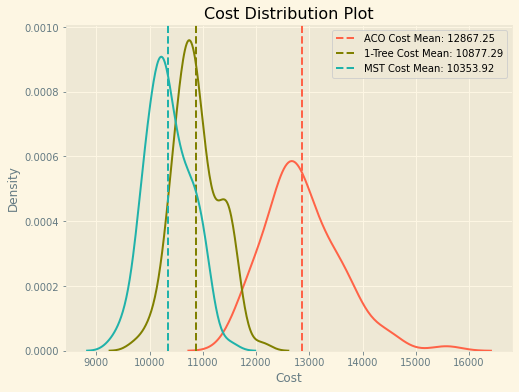

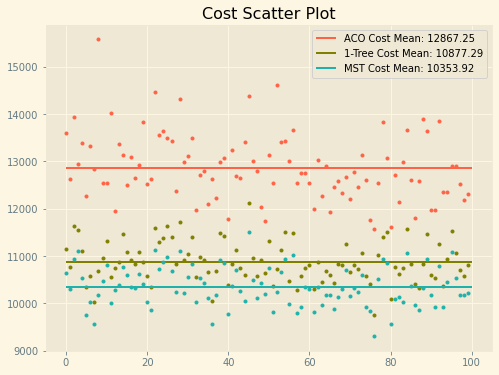

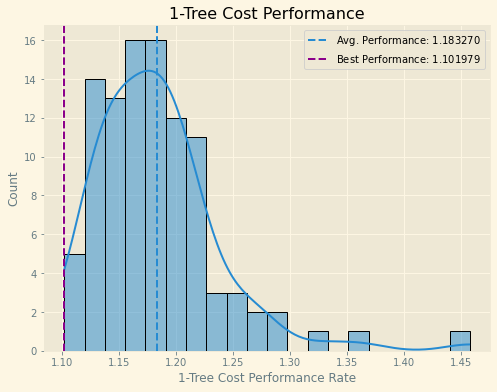

In [40]:
plot_cost_dist([data50['avg_cost'], data50['1TreeCost'], data50['MSTCost']])
plot_cost_line([data50['avg_cost'], data50['1TreeCost'], data50['MSTCost']])
plot_dist_(data50['avg_cost'] / data50['1TreeCost'], 20, '1-Tree Cost Performance Rate', 'Count', '1-Tree Cost Performance')

## 40 nodes

In [41]:
data40 = pd.read_csv('random_search_40.txt', delim_whitespace=True, header=None, names=['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'best_cost', 'avg_cost', 'cost_std', 'MSTCost', '1TreeCost'])

### Correlation Matrix

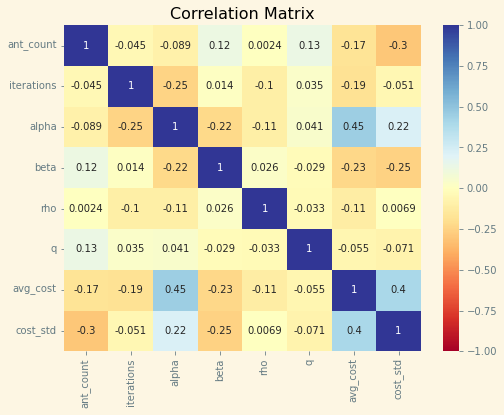

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

corr = data40[['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'avg_cost', 'cost_std']].corr()
sns.heatmap(corr, cmap='RdYlBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix')
plt.show()

### ACO Cost and ACO Cost STD Scatter Plot

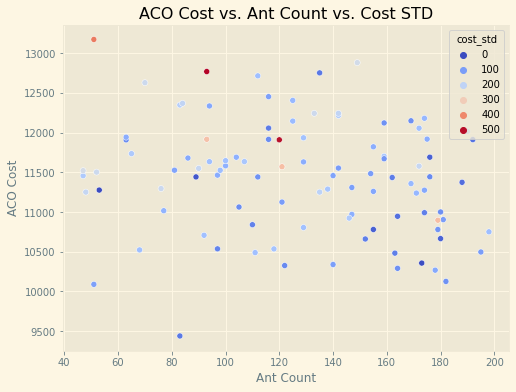

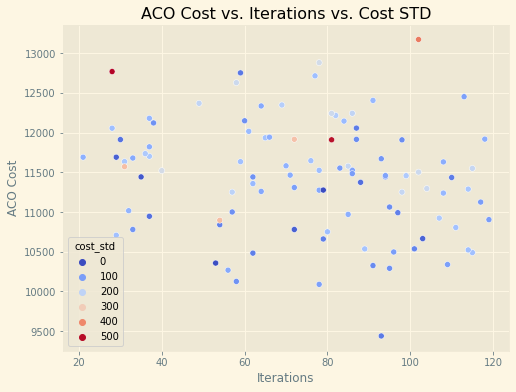

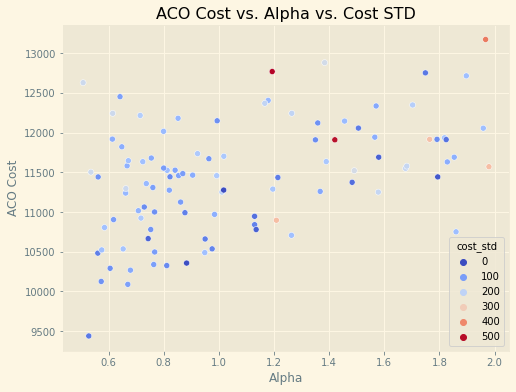

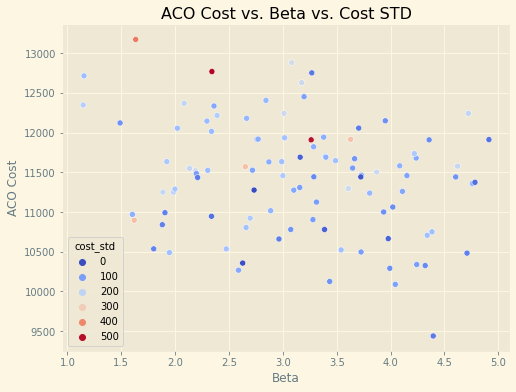

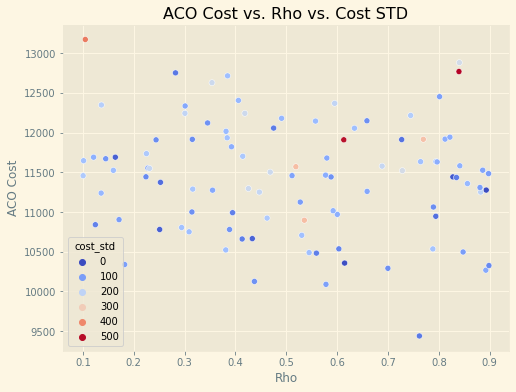

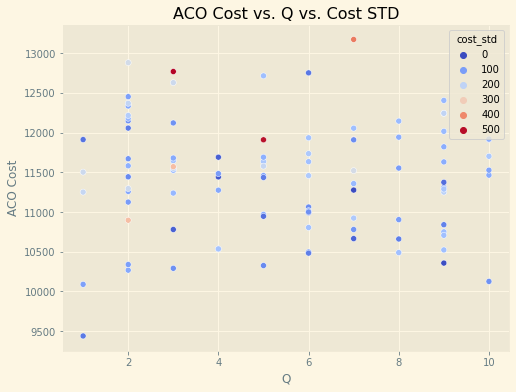

In [43]:
plot_std_dev_scatter_plot(data40, 'ant_count', 'avg_cost', 'Ant Count', 'ACO Cost', 'ACO Cost vs. Ant Count vs. Cost STD')
plot_std_dev_scatter_plot(data40, 'iterations', 'avg_cost', 'Iterations', 'ACO Cost' ,'ACO Cost vs. Iterations vs. Cost STD')
plot_std_dev_scatter_plot(data40, 'alpha', 'avg_cost', 'Alpha', 'ACO Cost', 'ACO Cost vs. Alpha vs. Cost STD')
plot_std_dev_scatter_plot(data40, 'beta', 'avg_cost', 'Beta', 'ACO Cost', 'ACO Cost vs. Beta vs. Cost STD')
plot_std_dev_scatter_plot(data40, 'rho', 'avg_cost', 'Rho', 'ACO Cost', 'ACO Cost vs. Rho vs. Cost STD')
plot_std_dev_scatter_plot(data40, 'q', 'avg_cost', 'Q', 'ACO Cost', 'ACO Cost vs. Q vs. Cost STD')

### Parameters Distributions

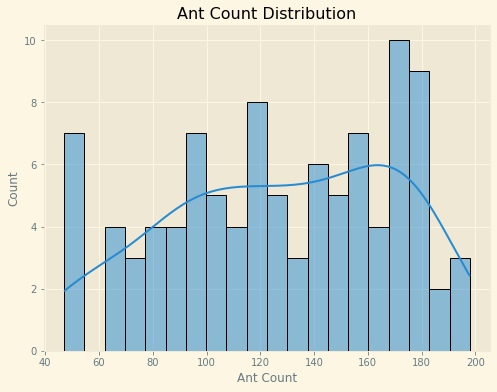

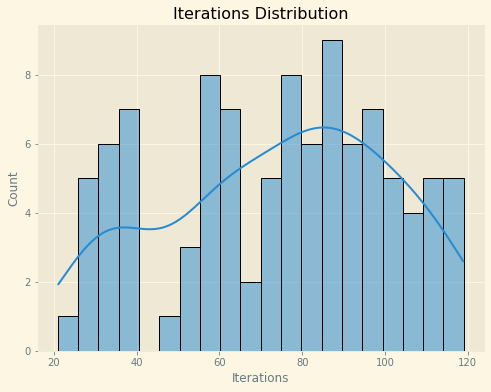

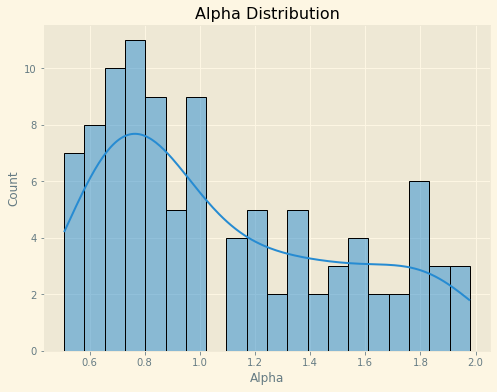

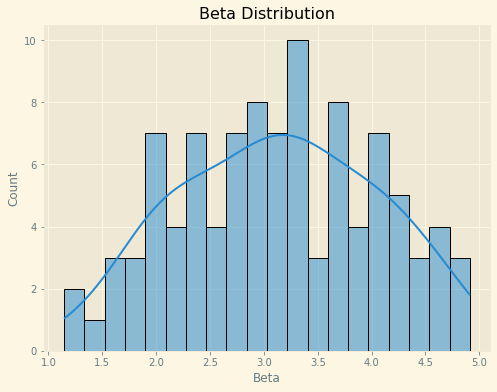

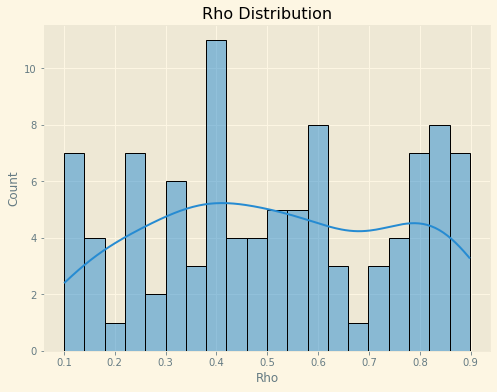

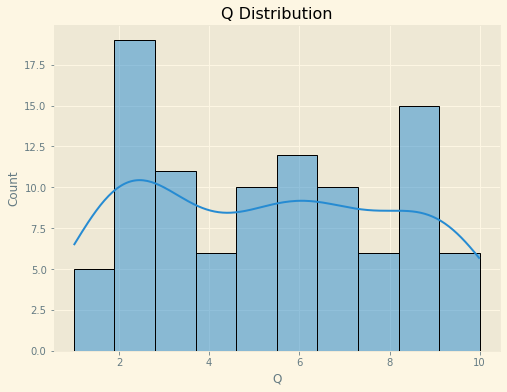

In [44]:
plot_dist(data40['ant_count'], 20, 'Ant Count', 'Count', 'Ant Count Distribution')
plot_dist(data40['iterations'], 20, 'Iterations', 'Count', 'Iterations Distribution')
plot_dist(data40['alpha'], 20, 'Alpha', 'Count', 'Alpha Distribution')
plot_dist(data40['beta'], 20, 'Beta', 'Count', 'Beta Distribution')
plot_dist(data40['rho'], 20, 'Rho', 'Count', 'Rho Distribution')
plot_dist(data40['q'], 10, 'Q', 'Count', 'Q Distribution')

### Parameters Intervals

In [45]:
get_subinterval(data40['ant_count'], data40['avg_cost'], 'Ant Count')
get_subinterval(data40['iterations'], data40['avg_cost'], 'Iterations')
get_subinterval(data40['alpha'], data40['avg_cost'], 'Alpha')
get_subinterval(data40['beta'], data40['avg_cost'], 'Beta')
get_subinterval(data40['rho'], data40['avg_cost'], 'Rho')
get_subinterval(data40['q'], data40['avg_cost'], 'Q')

Ant Count: (167.80, 182.90)
Iterations: (89.60, 99.40)
Alpha: (0.51, 0.65)
Beta: (4.16, 4.54)
Rho: (0.50, 0.58)
Q: (1.00, 1.90)


### ACO Performance

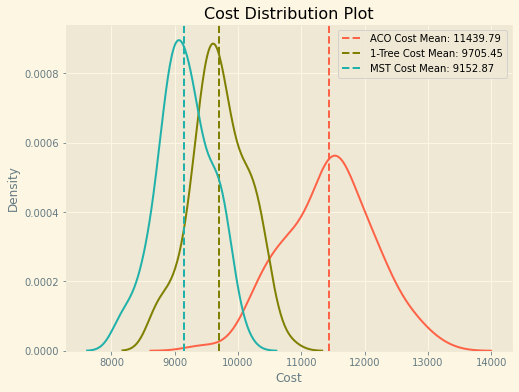

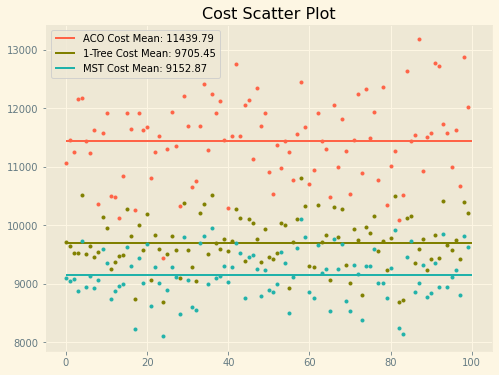

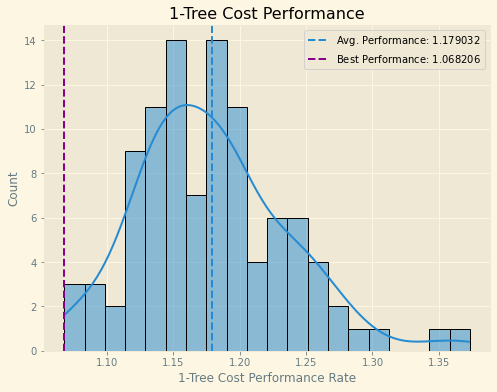

In [46]:
plot_cost_dist([data40['avg_cost'], data40['1TreeCost'], data40['MSTCost']])
plot_cost_line([data40['avg_cost'], data40['1TreeCost'], data40['MSTCost']])
plot_dist_(data40['avg_cost'] / data40['1TreeCost'], 20, '1-Tree Cost Performance Rate', 'Count', '1-Tree Cost Performance')

## 30 nodes

In [47]:
data30 = pd.read_csv('random_search_30.txt', delim_whitespace=True, header=None, names=['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'best_cost', 'avg_cost', 'cost_std', 'MSTCost', '1TreeCost'])

### Correlation Matrix

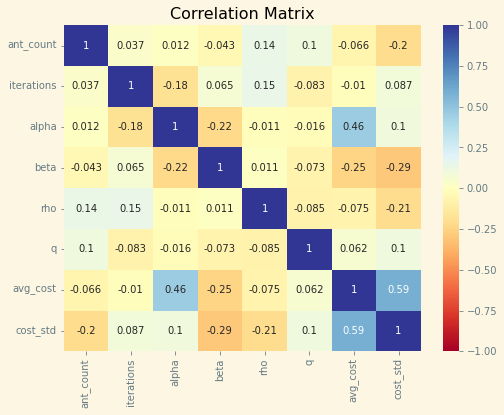

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

corr = data30[['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'avg_cost', 'cost_std']].corr()
sns.heatmap(corr, cmap='RdYlBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix')
plt.show()

### ACO Cost and ACO Cost STD Scatter Plot

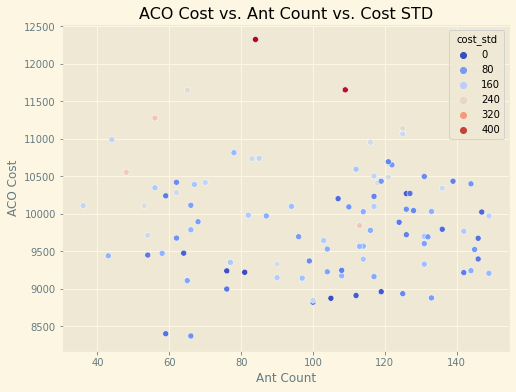

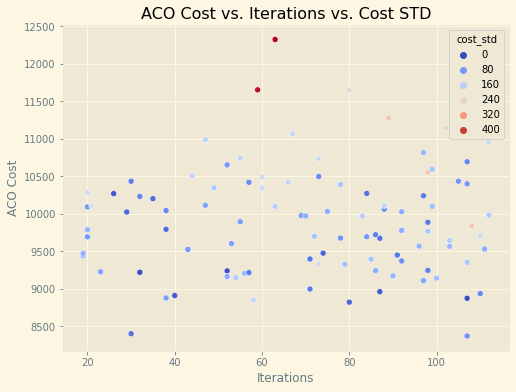

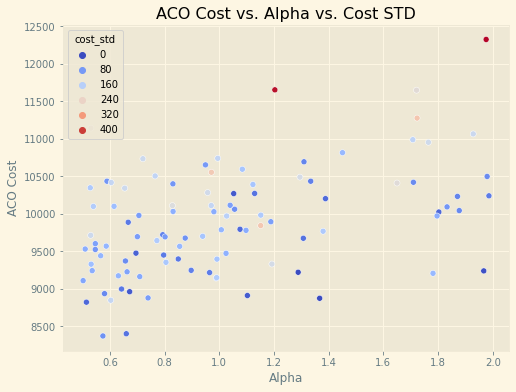

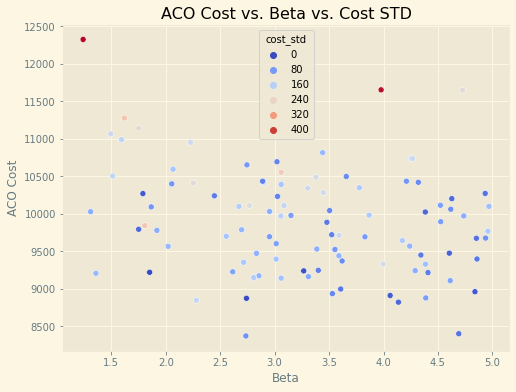

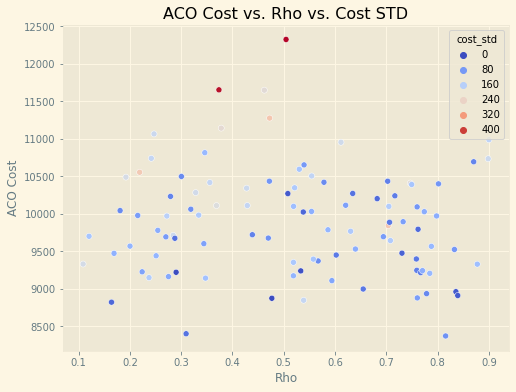

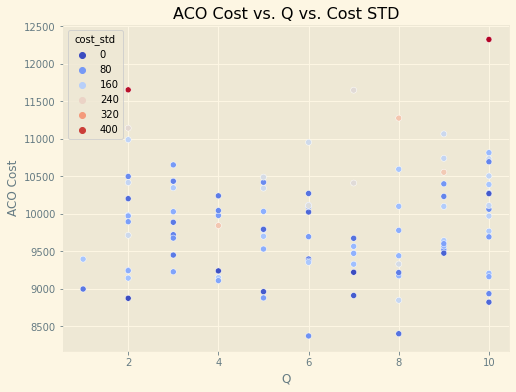

In [49]:
plot_std_dev_scatter_plot(data30, 'ant_count', 'avg_cost', 'Ant Count', 'ACO Cost', 'ACO Cost vs. Ant Count vs. Cost STD')
plot_std_dev_scatter_plot(data30, 'iterations', 'avg_cost', 'Iterations', 'ACO Cost' ,'ACO Cost vs. Iterations vs. Cost STD')
plot_std_dev_scatter_plot(data30, 'alpha', 'avg_cost', 'Alpha', 'ACO Cost', 'ACO Cost vs. Alpha vs. Cost STD')
plot_std_dev_scatter_plot(data30, 'beta', 'avg_cost', 'Beta', 'ACO Cost', 'ACO Cost vs. Beta vs. Cost STD')
plot_std_dev_scatter_plot(data30, 'rho', 'avg_cost', 'Rho', 'ACO Cost', 'ACO Cost vs. Rho vs. Cost STD')
plot_std_dev_scatter_plot(data30, 'q', 'avg_cost', 'Q', 'ACO Cost', 'ACO Cost vs. Q vs. Cost STD')

### Parameters Distributions

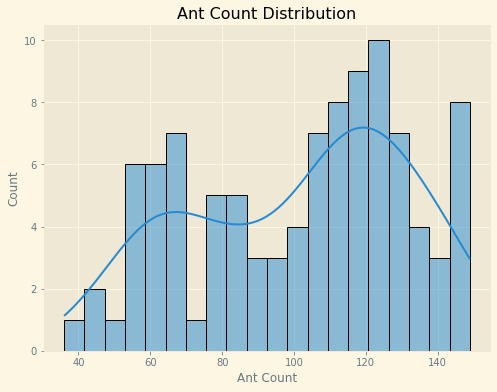

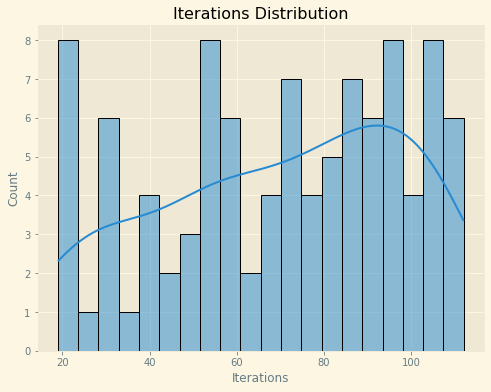

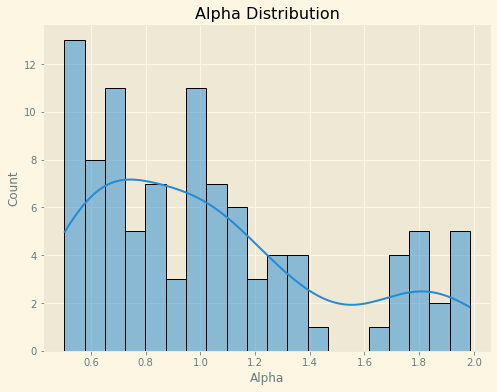

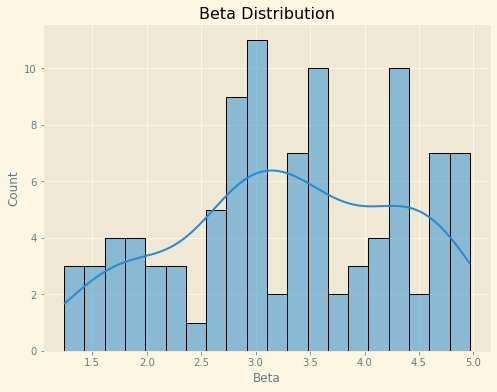

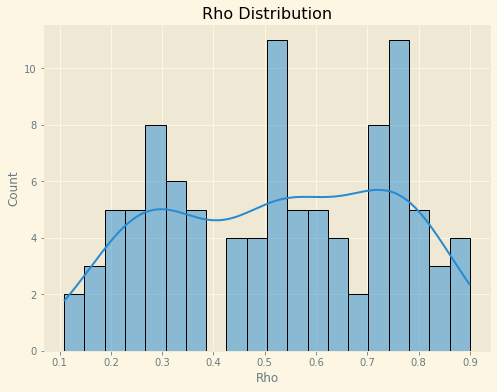

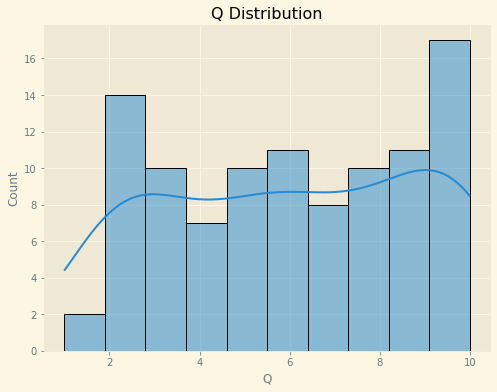

In [50]:
plot_dist(data30['ant_count'], 20, 'Ant Count', 'Count', 'Ant Count Distribution')
plot_dist(data30['iterations'], 20, 'Iterations', 'Count', 'Iterations Distribution')
plot_dist(data30['alpha'], 20, 'Alpha', 'Count', 'Alpha Distribution')
plot_dist(data30['beta'], 20, 'Beta', 'Count', 'Beta Distribution')
plot_dist(data30['rho'], 20, 'Rho', 'Count', 'Rho Distribution')
plot_dist(data30['q'], 10, 'Q', 'Count', 'Q Distribution')

### Parameters Intervals

In [51]:
get_subinterval(data30['ant_count'], data30['avg_cost'], 'Ant Count')
get_subinterval(data30['iterations'], data30['avg_cost'], 'Iterations')
get_subinterval(data30['alpha'], data30['avg_cost'], 'Alpha')
get_subinterval(data30['beta'], data30['avg_cost'], 'Beta')
get_subinterval(data30['rho'], data30['avg_cost'], 'Rho')
get_subinterval(data30['q'], data30['avg_cost'], 'Q')

Ant Count: (92.50, 103.80)
Iterations: (37.60, 46.90)
Alpha: (0.50, 0.65)
Beta: (3.48, 3.85)
Rho: (0.11, 0.19)
Q: (1.00, 1.90)


### ACO Performance

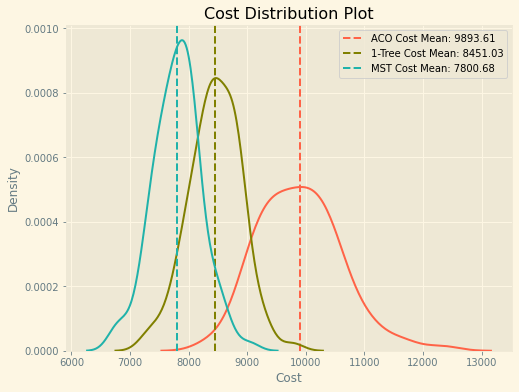

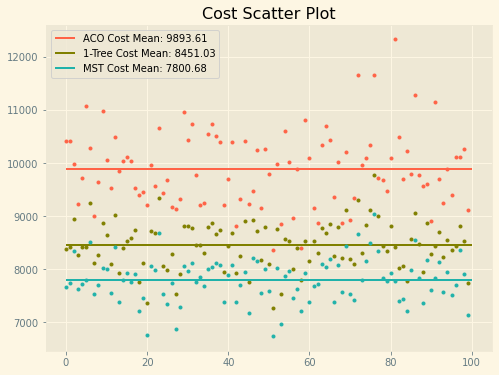

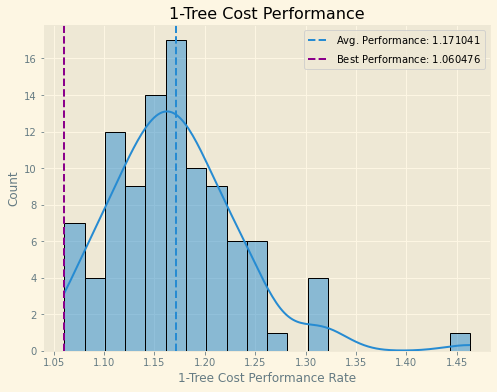

In [52]:
plot_cost_dist([data30['avg_cost'], data30['1TreeCost'], data30['MSTCost']])
plot_cost_line([data30['avg_cost'], data30['1TreeCost'], data30['MSTCost']])
plot_dist_(data30['avg_cost'] / data30['1TreeCost'], 20, '1-Tree Cost Performance Rate', 'Count', '1-Tree Cost Performance')

## 20 nodes

In [53]:
data20 = pd.read_csv('random_search_20.txt', delim_whitespace=True, header=None, names=['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'best_cost', 'avg_cost', 'cost_std', 'MSTCost', '1TreeCost'])

### Correlation Matrix

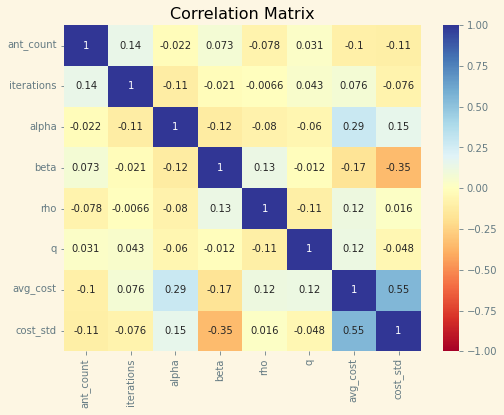

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))

corr = data20[['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'avg_cost', 'cost_std']].corr()
sns.heatmap(corr, cmap='RdYlBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix')
plt.show()

### ACO Cost and ACO Cost STD Scatter Plot

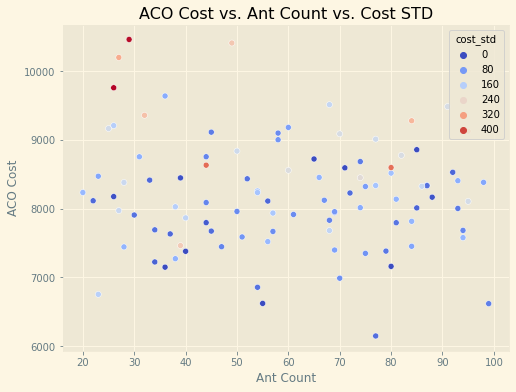

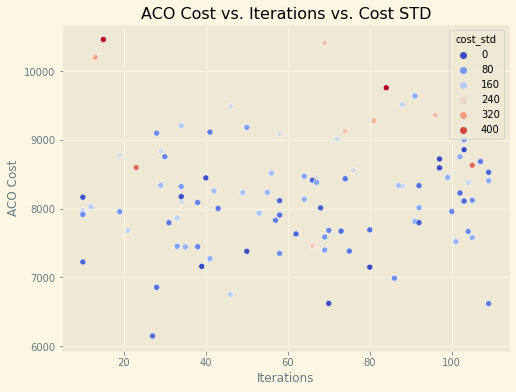

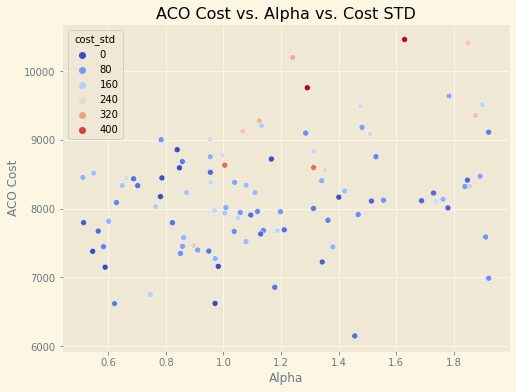

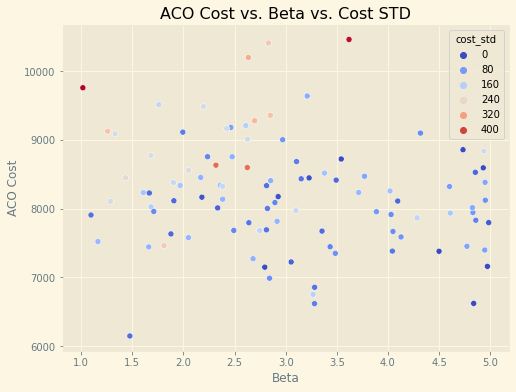

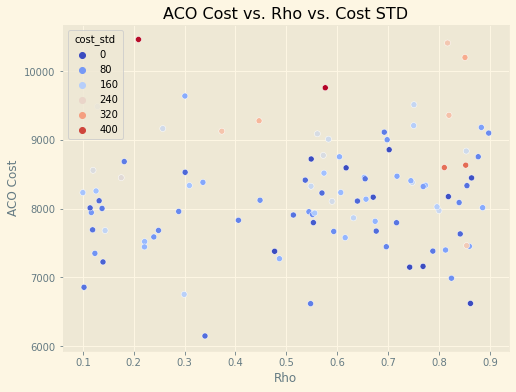

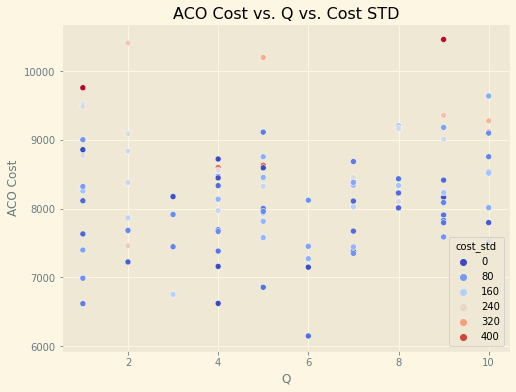

In [55]:
plot_std_dev_scatter_plot(data20, 'ant_count', 'avg_cost', 'Ant Count', 'ACO Cost', 'ACO Cost vs. Ant Count vs. Cost STD')
plot_std_dev_scatter_plot(data20, 'iterations', 'avg_cost', 'Iterations', 'ACO Cost' ,'ACO Cost vs. Iterations vs. Cost STD')
plot_std_dev_scatter_plot(data20, 'alpha', 'avg_cost', 'Alpha', 'ACO Cost', 'ACO Cost vs. Alpha vs. Cost STD')
plot_std_dev_scatter_plot(data20, 'beta', 'avg_cost', 'Beta', 'ACO Cost', 'ACO Cost vs. Beta vs. Cost STD')
plot_std_dev_scatter_plot(data20, 'rho', 'avg_cost', 'Rho', 'ACO Cost', 'ACO Cost vs. Rho vs. Cost STD')
plot_std_dev_scatter_plot(data20, 'q', 'avg_cost', 'Q', 'ACO Cost', 'ACO Cost vs. Q vs. Cost STD')

### Parameters Distributions

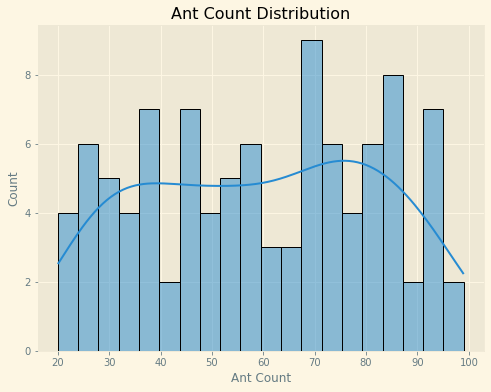

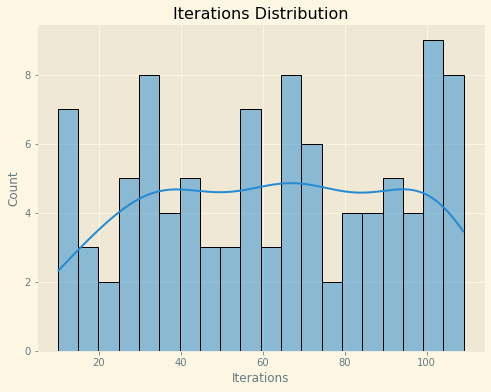

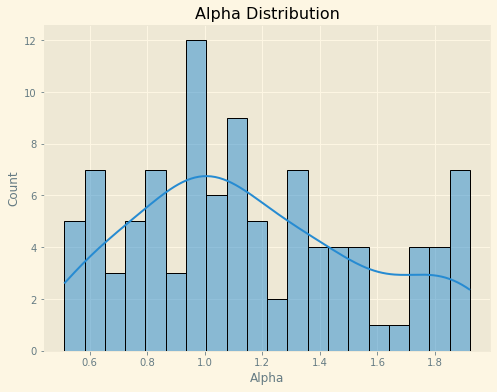

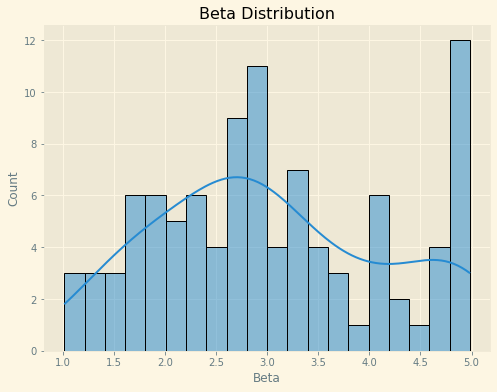

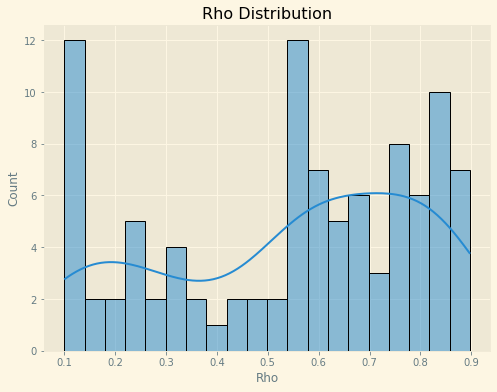

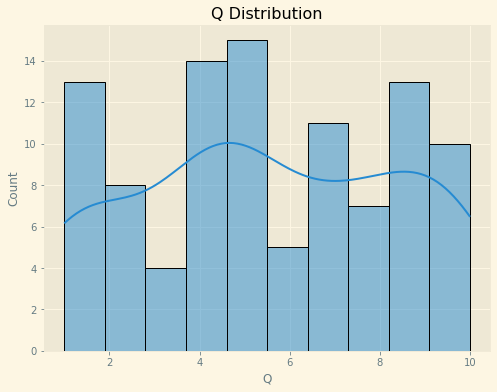

In [56]:
plot_dist(data20['ant_count'], 20, 'Ant Count', 'Count', 'Ant Count Distribution')
plot_dist(data20['iterations'], 20, 'Iterations', 'Count', 'Iterations Distribution')
plot_dist(data20['alpha'], 20, 'Alpha', 'Count', 'Alpha Distribution')
plot_dist(data20['beta'], 20, 'Beta', 'Count', 'Beta Distribution')
plot_dist(data20['rho'], 20, 'Rho', 'Count', 'Rho Distribution')
plot_dist(data20['q'], 10, 'Q', 'Count', 'Q Distribution')

### Parameters Intervals

In [57]:
get_subinterval(data20['ant_count'], data20['avg_cost'], 'Ant Count')
get_subinterval(data20['iterations'], data20['avg_cost'], 'Iterations')
get_subinterval(data20['alpha'], data20['avg_cost'], 'Alpha')
get_subinterval(data20['beta'], data20['avg_cost'], 'Beta')
get_subinterval(data20['rho'], data20['avg_cost'], 'Rho')
get_subinterval(data20['q'], data20['avg_cost'], 'Q')

Ant Count: (35.80, 43.70)
Iterations: (19.90, 29.80)
Alpha: (0.51, 0.65)
Beta: (3.79, 4.19)
Rho: (0.34, 0.42)
Q: (5.50, 6.40)


### ACO Performance

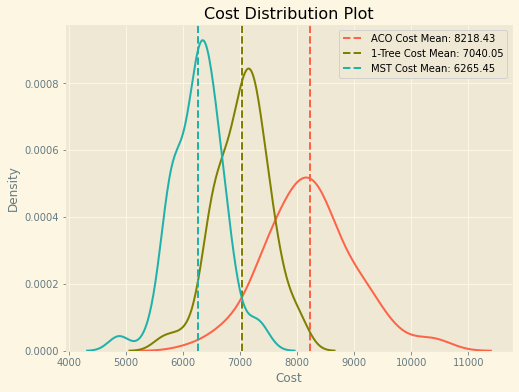

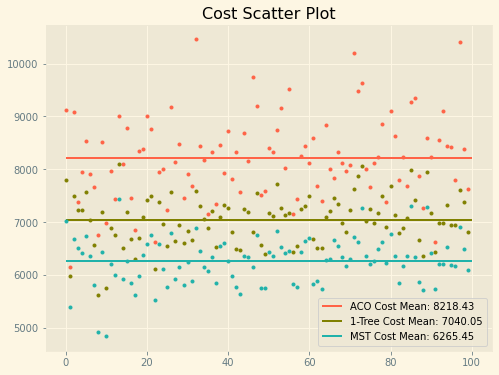

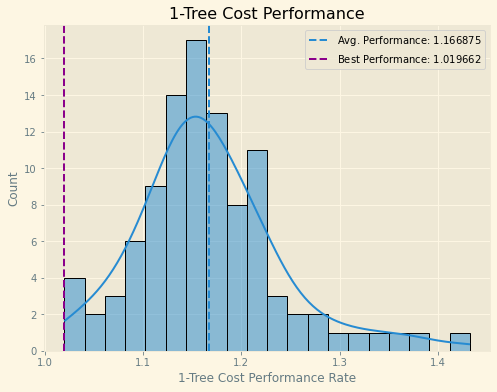

In [58]:
plot_cost_dist([data20['avg_cost'], data20['1TreeCost'], data20['MSTCost']])
plot_cost_line([data20['avg_cost'], data20['1TreeCost'], data20['MSTCost']])
plot_dist_(data20['avg_cost'] / data20['1TreeCost'], 20, '1-Tree Cost Performance Rate', 'Count', '1-Tree Cost Performance')

## 10 nodes

In [59]:
data10 = pd.read_csv('random_search_10.txt', delim_whitespace=True, header=None, names=['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'best_cost', 'avg_cost', 'cost_std', 'MSTCost', '1TreeCost'])

### Correlation Matrix

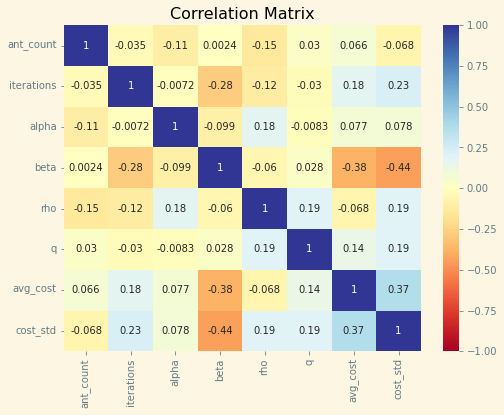

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

corr = data10[['ant_count', 'iterations', 'alpha', 'beta', 'rho', 'q', 'avg_cost', 'cost_std']].corr()
sns.heatmap(corr, cmap='RdYlBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix')
plt.show()

### ACO Cost and ACO Cost STD Scatter Plot

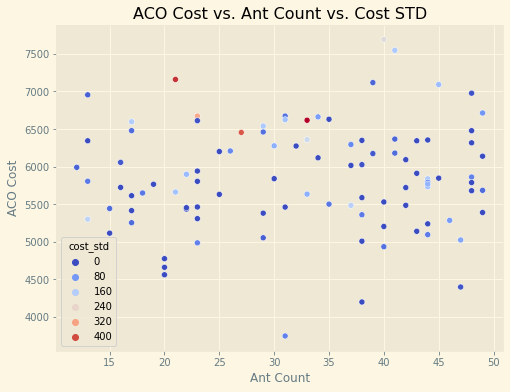

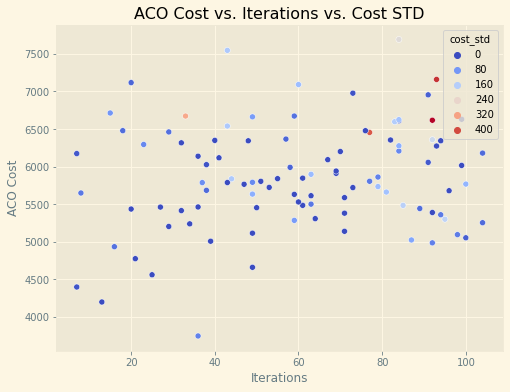

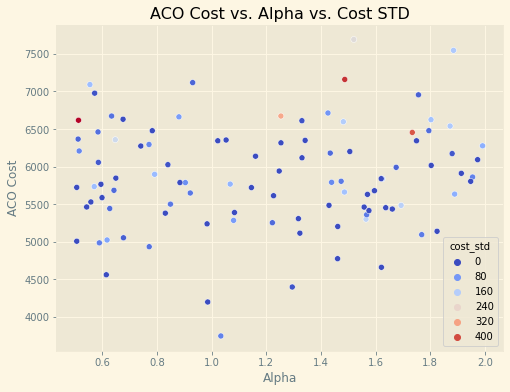

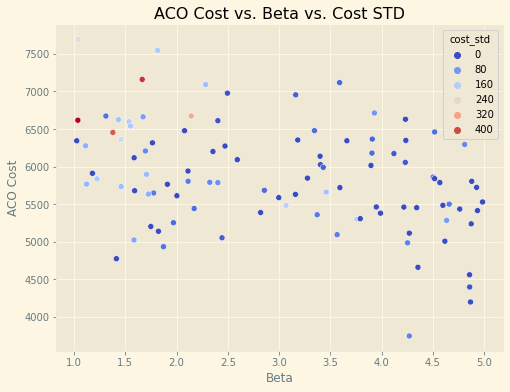

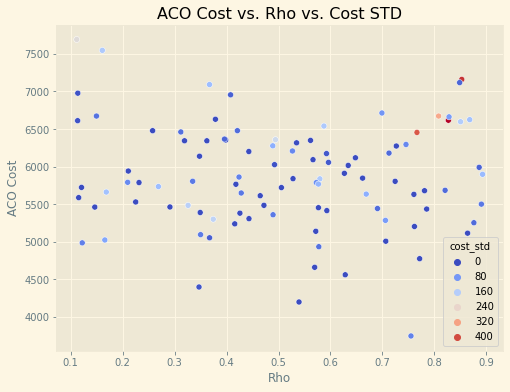

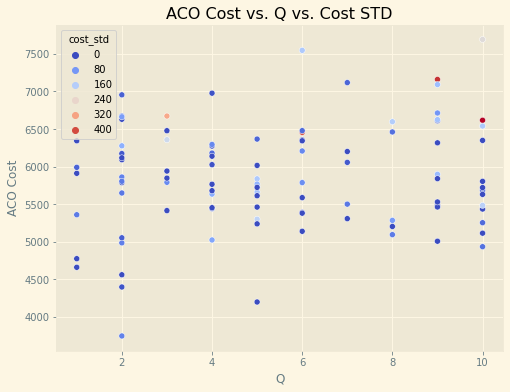

In [61]:
plot_std_dev_scatter_plot(data10, 'ant_count', 'avg_cost', 'Ant Count', 'ACO Cost', 'ACO Cost vs. Ant Count vs. Cost STD')
plot_std_dev_scatter_plot(data10, 'iterations', 'avg_cost', 'Iterations', 'ACO Cost' ,'ACO Cost vs. Iterations vs. Cost STD')
plot_std_dev_scatter_plot(data10, 'alpha', 'avg_cost', 'Alpha', 'ACO Cost', 'ACO Cost vs. Alpha vs. Cost STD')
plot_std_dev_scatter_plot(data10, 'beta', 'avg_cost', 'Beta', 'ACO Cost', 'ACO Cost vs. Beta vs. Cost STD')
plot_std_dev_scatter_plot(data10, 'rho', 'avg_cost', 'Rho', 'ACO Cost', 'ACO Cost vs. Rho vs. Cost STD')
plot_std_dev_scatter_plot(data10, 'q', 'avg_cost', 'Q', 'ACO Cost', 'ACO Cost vs. Q vs. Cost STD')

### Parameters Distributions

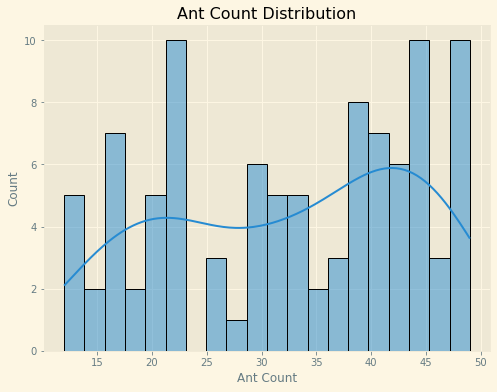

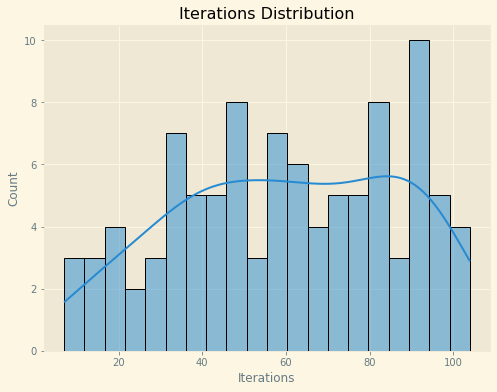

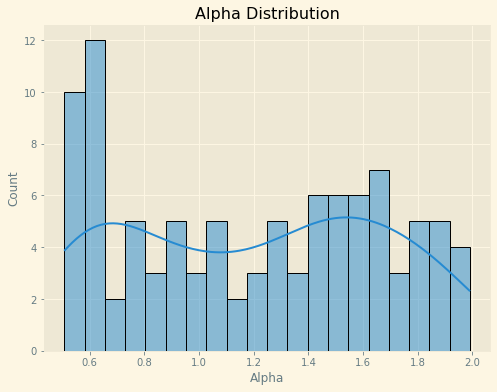

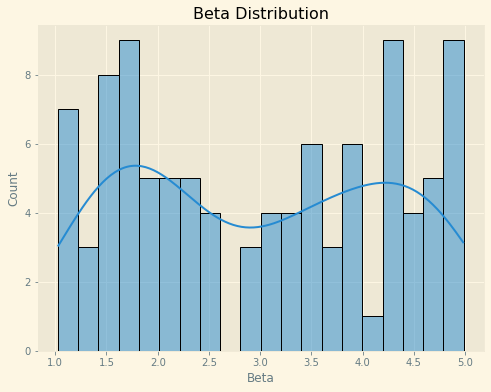

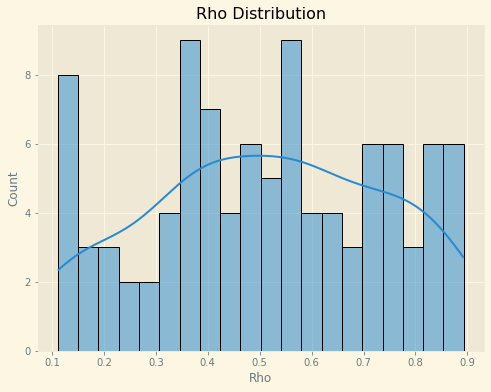

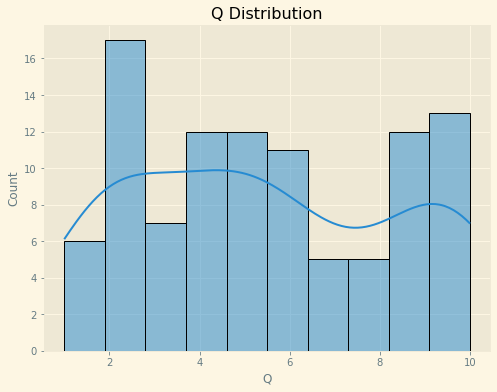

In [62]:
plot_dist(data10['ant_count'], 20, 'Ant Count', 'Count', 'Ant Count Distribution')
plot_dist(data10['iterations'], 20, 'Iterations', 'Count', 'Iterations Distribution')
plot_dist(data10['alpha'], 20, 'Alpha', 'Count', 'Alpha Distribution')
plot_dist(data10['beta'], 20, 'Beta', 'Count', 'Beta Distribution')
plot_dist(data10['rho'], 20, 'Rho', 'Count', 'Rho Distribution')
plot_dist(data10['q'], 10, 'Q', 'Count', 'Q Distribution')

### Parameters Intervals

In [63]:
get_subinterval(data10['ant_count'], data10['avg_cost'], 'Ant Count')
get_subinterval(data10['iterations'], data10['avg_cost'], 'Iterations')
get_subinterval(data10['alpha'], data10['avg_cost'], 'Alpha')
get_subinterval(data10['beta'], data10['avg_cost'], 'Beta')
get_subinterval(data10['rho'], data10['avg_cost'], 'Rho')
get_subinterval(data10['q'], data10['avg_cost'], 'Q')

Ant Count: (19.40, 23.10)
Iterations: (7.00, 16.70)
Alpha: (0.95, 1.10)
Beta: (4.59, 4.99)
Rho: (0.74, 0.81)
Q: (1.00, 1.90)


### ACO Performance

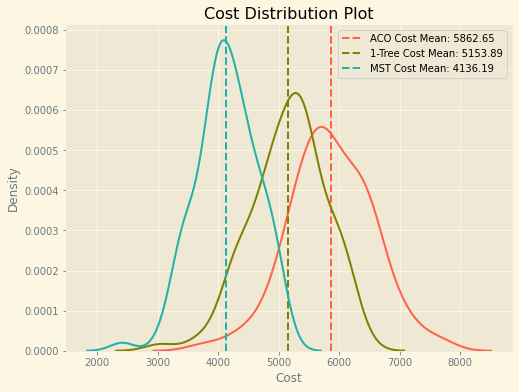

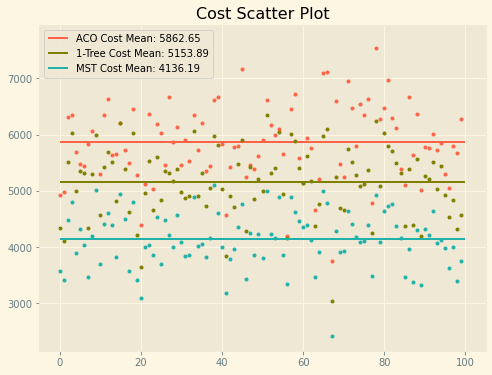

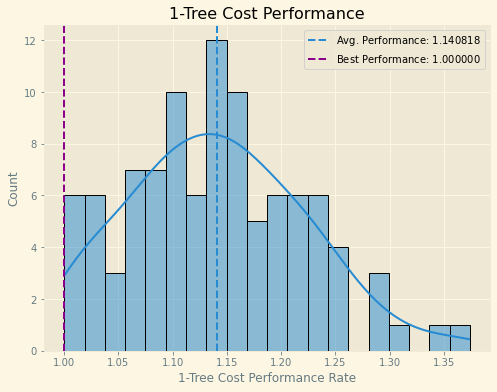

In [64]:
plot_cost_dist([data10['avg_cost'], data10['1TreeCost'], data10['MSTCost']])
plot_cost_line([data10['avg_cost'], data10['1TreeCost'], data10['MSTCost']])
plot_dist_(data10['avg_cost'] / data10['1TreeCost'], 20, '1-Tree Cost Performance Rate', 'Count', '1-Tree Cost Performance')